In [1]:
import numpy as np
import pandas as pd

In [2]:
# prompt: write a program to extract file though kaggle api command

!pip install kaggle


!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Replace 'username/dataset-name' with the actual dataset you want to download.
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

# Unzip the downloaded file
!unzip brain-tumor-classification-mri.zip


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 99% 86.0M/86.8M [00:04<00:00, 23.8MB/s]
100% 86.8M/86.8M [00:04<00:00, 18.3MB/s]
Archive:  brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/

In [3]:
pip install keras

In [4]:
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image
from sklearn.metrics import accuracy_score

In [5]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import os

In [6]:
#splitting for training and testing

X_train=[]
Y_train=[]
image_size=150
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath=os.path.join('/content/Training',i)
    for j in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath=os.path.join('/content/Testing',i)
    for j in os.listdir(folderPath):
        img=cv2.imread(os.path.join(folderPath,j))
        img=cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train=np.array(X_train)
Y_train=np.array(Y_train)

In [7]:
X_train , Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [9]:
y_train_new=[]
for i in Y_train:
  y_train_new.append(labels.index(i))
y_train=y_train_new
y_train=tf.keras.utils.to_categorical(y_train)

y_test_new=[]
for i in Y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test=tf.keras.utils.to_categorical(y_test)

In [10]:
Y_test

array(['pituitary_tumor', 'no_tumor', 'glioma_tumor', 'meningioma_tumor',
       'pituitary_tumor', 'meningioma_tumor', 'no_tumor',
       'pituitary_tumor', 'meningioma_tumor', 'meningioma_tumor',
       'no_tumor', 'glioma_tumor', 'glioma_tumor', 'meningioma_tumor',
       'meningioma_tumor', 'pituitary_tumor', 'pituitary_tumor',
       'no_tumor', 'pituitary_tumor', 'no_tumor', 'pituitary_tumor',
       'glioma_tumor', 'meningioma_tumor', 'meningioma_tumor',
       'meningioma_tumor', 'pituitary_tumor', 'glioma_tumor',
       'pituitary_tumor', 'pituitary_tumor', 'meningioma_tumor',
       'meningioma_tumor', 'pituitary_tumor', 'glioma_tumor',
       'meningioma_tumor', 'pituitary_tumor', 'no_tumor',
       'pituitary_tumor', 'no_tumor', 'glioma_tumor', 'no_tumor',
       'no_tumor', 'meningioma_tumor', 'pituitary_tumor',
       'meningioma_tumor', 'meningioma_tumor', 'pituitary_tumor',
       'glioma_tumor', 'meningioma_tumor', 'pituitary_tumor',
       'glioma_tumor', 'no_tumor', 

In [11]:
#Building out model
model =Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 146, 146, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 73, 73, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 71, 71, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 69, 69, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 69, 69, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 34, 34, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 11, 11, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 5, 5, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,299,460 (16.40 MB)

 Trainable params: 4,299,460 (16.40 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [14]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 38s 246ms/step - accuracy: 0.3051 - loss: 5.5513 - val_accuracy: 0.4830 - val_loss: 1.2575
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - accuracy: 0.4914 - loss: 1.1316 - val_accuracy: 0.5510 - val_loss: 1.0780
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.6065 - loss: 0.9482 - val_accuracy: 0.6769 - val_loss: 0.8956
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.6893 - loss: 0.8034 - val_accuracy: 0.6224 - val_loss: 0.8867
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.6979 - loss: 0.7568 - val_accuracy: 0.6327 - val_loss: 0.7851
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - accuracy: 0.7083 - loss: 0.7077 - val_accuracy: 0.7517 - val_loss: 0.6556
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7858 - loss: 0.5694 - val_accuracy: 0.8027 - val_loss: 0.5353
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.8316 - loss: 0.4335 - val_accuracy: 0.816

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

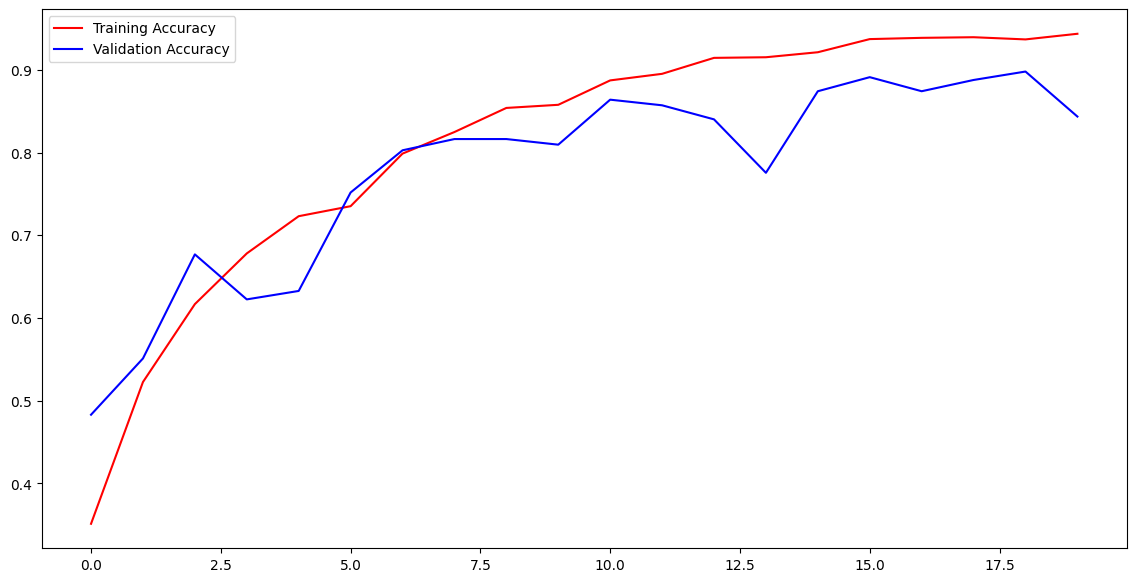

In [18]:

model.save('BrainTumor.h5')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=range(len(acc))

fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

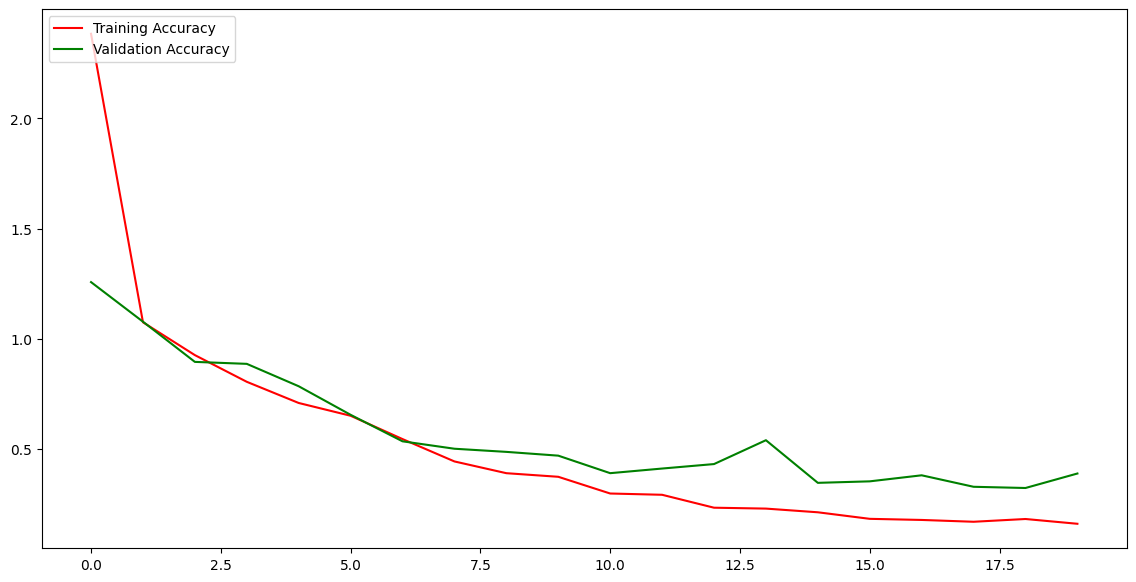

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(loss))

fig=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label='Training Accuracy')
plt.plot(epochs,val_loss,'g',label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show

In [28]:
#Prediction
img=cv2.imread('/content/Testing/glioma_tumor/image(10).jpg')
img=cv2.resize(img,(150,150))
img_array=np.array(img)
img_array.shape

(150, 150, 3)

In [29]:
img_array=img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [30]:
pip install tensforflow

ERROR: Could not find a version that satisfies the requirement tensforflow (from versions: none)
ERROR: No matching distribution found for tensforflow


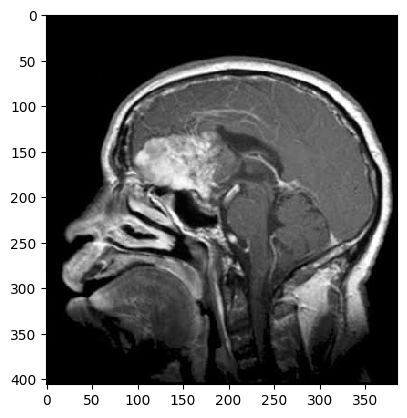

In [32]:
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/Testing/glioma_tumor/image(10).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()


In [37]:
a=model.predict(img_array)
indices=a.argmax()
p=indices

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [38]:
if p==0:
  print("The person has a glioma tumor")
elif p==1:
  print("The person has a meningioma tumor")
elif p==2:
  print("The person has no tumor")
else :
  print("The person has Pituitary tumor")

The person has a glioma tumor
